In [69]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("data.csv",usecols=[1,2,3,4])
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10


In [70]:
data.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean
564,M,21.56,22.39,142.00
565,M,20.13,28.25,131.20
566,M,16.60,28.08,108.30
567,M,20.60,29.33,140.10
568,B,7.76,24.54,47.92


In [71]:
# data.drop(["id","Unnamed: 32"],axis=1)
data=data.dropna()
data

,diagnosis,radius_mean,texture_mean,perimeter_mean
0,M,17.99,10.38,122.80
1,M,20.57,17.77,132.90
2,M,19.69,21.25,130.00
3,M,11.42,20.38,77.58
4,M,20.29,14.34,135.10
...,...,...,...,...
564,M,21.56,22.39,142.00
565,M,20.13,28.25,131.20
566,M,16.60,28.08,108.30
567,M,20.60,29.33,140.10


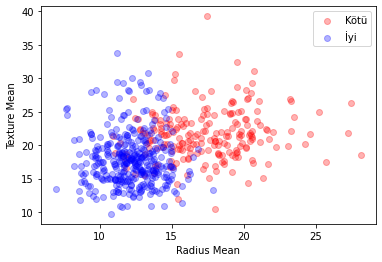

In [72]:
M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]

plt.scatter(M.radius_mean,M.texture_mean,color="r",label="Kötü",alpha=0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="b",label="İyi",alpha=0.3)

plt.xlabel("Radius Mean")
plt.ylabel("Texture Mean")
plt.legend()
plt.show()

In [73]:
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis]#we turned to diagnosis values M to 1 or 0
y=data.diagnosis.values
x_data=data.drop(["diagnosis"],axis=1)

In [74]:
import numpy as np
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
D:\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)
x_train.shape
y_train.shape

(398,)

In [76]:
import statsmodels.api as sm
lm=sm.OLS(y_train,x_train)

model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.708
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              319.7
Date:                Tue, 26 Apr 2022   Prob (F-statistic):                   2.82e-105
Time:                        17:14:15   Log-Likelihood:                         -124.04
No. Observations:                 398   AIC:                                      254.1
Df Residuals:                     395   BIC:                                      266.0
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
radius_mean      -10.3883      1.540     -6.743      0.000     -13.417      -7.360
texture_mean      -0.0276      0.097     -0.286      0.775      -0.218       0.163
perimeter_mean    11.8498      1.549      7.648      0.000       8.804      14.896
==============================================================================
Omnibus:                       44.006   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.867
Skew:                           0.673   Prob(JB):                     5.99e-09
Kurtosis:                       2.311   Cond. No.                         82.6
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
model=knn.fit(x_train,y_train)
prediction=knn.predict(x_test)
print(" {} nn score: {} ".format(3,knn.score(x_test,y_test)))

 3 nn score: 0.8771929824561403 
